<a href="https://colab.research.google.com/github/A190nux/BasicNN/blob/main/BasicNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [ ]:
import torch
import numpy as np
import seaborn as sns
from torch import nn
from tqdm.autonotebook import tqdm
from torch.utils.data import Dataset , DataLoader
import matplotlib.pyplot as plt


torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

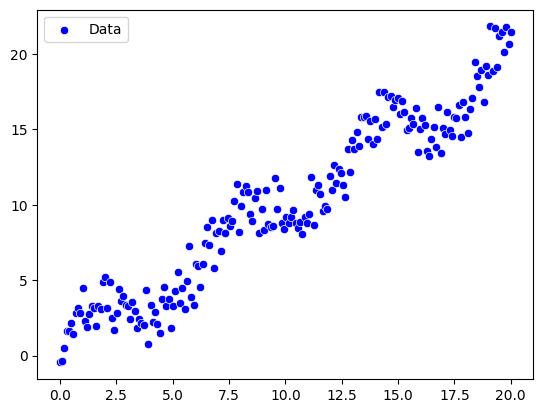

In [ ]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [ ]:

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [ ]:
df = Simple1DRegressionDataset(X,y)


In [ ]:
df[0]


(tensor([0.]), tensor([-0.4516]))

In [ ]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [ ]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[8.1429]])]

In [ ]:
class Model(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear1 = nn.Linear(in_features, 2)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(2, 4)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(4, 4)
    self.relu3 = nn.ReLU()
    self.linear4 = nn.Linear(4, 4)
    self.relu4 = nn.ReLU()
    self.linear5 = nn.Linear(4, 4)
    self.relu5 = nn.ReLU()
    self.linear6 = nn.Linear(4, 4)
    self.relu6 = nn.ReLU()
    self.linear7 = nn.Linear(4, 4)
    self.relu7 = nn.ReLU()
    self.linear8 = nn.Linear(4, 2)
    self.relu8 = nn.ReLU()
    self.linearOut = nn.Linear(2, out_features)
    self.reluOut = nn.ReLU()

  def forward(self, x):
    x = self.linear1(x)
    x = self.relu1(x)
    x = self.linear2(x)
    x = self.relu2(x)
    x = self.linear3(x)
    x = self.relu3(x)
    x = self.linear4(x)
    x = self.relu4(x)
    x = self.linear5(x)
    x = self.relu5(x)
    x = self.linear6(x)
    x = self.relu6(x)
    x = self.linear7(x)
    x = self.relu7(x)
    x = self.linear8(x)
    x = self.relu8(x)
    x = self.linearOut(x)
    x = self.reluOut(x)
    return x

In [ ]:
  # construct the model using Linear block
in_features = 1
out_features = 1
model_2 = Model(in_features,out_features)


In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [ ]:
def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):
    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)
    model.to(device)
    losses = []
    for epoch in tqdm(range(epochs), desc="Epochs"):
        model = model.train()
        running_loss = 0
        for inputs , labels in training_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            y_pred = model(inputs)
            loss = loss_fn(y_pred, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        losses.append(running_loss)

    # Plotting the loss graph
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

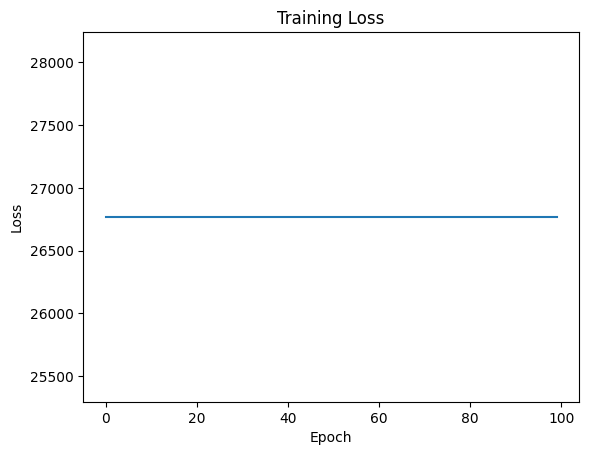

In [101]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


In [ ]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

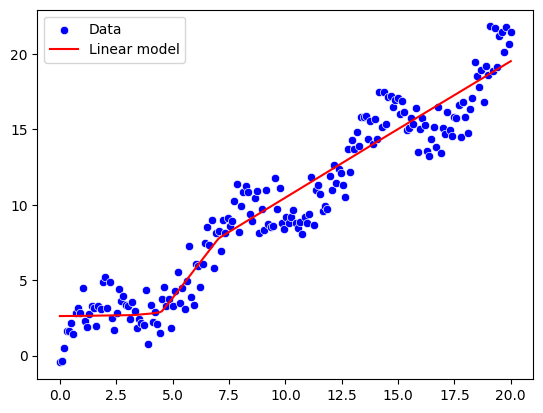

In [ ]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
